In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
pd.set_option('display.float_format',lambda x : '%.2f' % x)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
#Initialization the pyspark envionment, it will be named Assignment_722 and used for the assignment.
import findspark
findspark.init('/home/ubuntu/spark-3.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Assignment_722").getOrCreate()

In [3]:
#Load csv file into spark and evaluate the status of it.
dataF = spark.read.load("ObesityDataSet_raw_and_data_sinthetic.csv", format = "csv", header = "true")
dataF.printSchema()
dataF.columns

root
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- family_history_with_overweight: string (nullable = true)
 |-- FAVC: string (nullable = true)
 |-- FCVC: string (nullable = true)
 |-- NCP: string (nullable = true)
 |-- CAEC: string (nullable = true)
 |-- SMOKE: string (nullable = true)
 |-- CH2O: string (nullable = true)
 |-- SCC: string (nullable = true)
 |-- FAF: string (nullable = true)
 |-- TUE: string (nullable = true)
 |-- CALC: string (nullable = true)
 |-- MTRANS: string (nullable = true)
 |-- NObeyesdad: string (nullable = true)



['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [5]:
dataF.show()

+------+---+------+------+------------------------------+----+----+---+----------+-----+----+---+---+---+----------+--------------------+-------------------+
|Gender|Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|      CAEC|SMOKE|CH2O|SCC|FAF|TUE|      CALC|              MTRANS|         NObeyesdad|
+------+---+------+------+------------------------------+----+----+---+----------+-----+----+---+---+---+----------+--------------------+-------------------+
|Female| 21|  1.62|    64|                           yes|  no|   2|  3| Sometimes|   no|   2| no|  0|  1|        no|Public_Transporta...|      Normal_Weight|
|Female| 21|  1.52|    56|                           yes|  no|   3|  3| Sometimes|  yes|   3|yes|  3|  0| Sometimes|Public_Transporta...|      Normal_Weight|
|  Male| 23|   1.8|    77|                           yes|  no|   2|  3| Sometimes|   no|   2| no|  2|  1|Frequently|Public_Transporta...|      Normal_Weight|
|  Male| 27|   1.8|    87|                          

In [6]:
dataF.describe().show()

+-------+------+-----------------+-------------------+------------------+------------------------------+----+------------------+------------------+------+-----+------------------+----+------------------+------------------+------+----------+-------------------+
|summary|Gender|              Age|             Height|            Weight|family_history_with_overweight|FAVC|              FCVC|               NCP|  CAEC|SMOKE|              CH2O| SCC|               FAF|               TUE|  CALC|    MTRANS|         NObeyesdad|
+-------+------+-----------------+-------------------+------------------+------------------------------+----+------------------+------------------+------+-----+------------------+----+------------------+------------------+------+----------+-------------------+
|  count|  2111|             2111|               2111|              2111|                          2111|2111|              2111|              2111|  2111| 2111|              2111|2111|              2111|              

In [14]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
print(dataF.columns)

['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [16]:
#Check possible output for categories for possible missing values
dataF.select("Gender").distinct().show() #Female, Male, Other
dataF.select("family_history_with_overweight").distinct().show() # 0 = No, 1 = Yes
dataF.select("CALC").distinct().show()
dataF.select("SMOKE").distinct().show() 
dataF.select("SCC").distinct().show()
dataF.select("CALC").distinct().show() # Urban, Rural
dataF.select("MTRANS").distinct().show() # Smoke, Unknown, Never smoked, Formely smoked
dataF.select("NObeyesdad").distinct().show() # 0 = No, 1 = Yes


+------+
|Gender|
+------+
|Female|
|  Male|
+------+

+------------------------------+
|family_history_with_overweight|
+------------------------------+
|                            no|
|                           yes|
+------------------------------+

+----------+
|      CALC|
+----------+
| Sometimes|
|Frequently|
|        no|
|    Always|
+----------+

+-----+
|SMOKE|
+-----+
|   no|
|  yes|
+-----+

+---+
|SCC|
+---+
| no|
|yes|
+---+

+----------+
|      CALC|
+----------+
| Sometimes|
|Frequently|
|        no|
|    Always|
+----------+

+--------------------+
|              MTRANS|
+--------------------+
|                Bike|
|             Walking|
|          Automobile|
|           Motorbike|
|Public_Transporta...|
+--------------------+

+-------------------+
|         NObeyesdad|
+-------------------+
|   Obesity_Type_III|
| Overweight_Level_I|
|    Obesity_Type_II|
|Insufficient_Weight|
|Overweight_Level_II|
|      Normal_Weight|
|     Obesity_Type_I|
+-------------------+


In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
from pyspark.sql.functions import col,isnan, when, count
dataF.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataF.columns]
   ).show()

+------+---+------+------+------------------------------+----+----+---+----+-----+----+---+---+---+----+------+----------+
|Gender|Age|Height|Weight|family_history_with_overweight|FAVC|FCVC|NCP|CAEC|SMOKE|CH2O|SCC|FAF|TUE|CALC|MTRANS|NObeyesdad|
+------+---+------+------+------------------------------+----+----+---+----+-----+----+---+---+---+----+------+----------+
|     0|  0|     0|     0|                             0|   0|   0|  0|   0|    0|   0|  0|  0|  0|   0|     0|         0|
+------+---+------+------+------------------------------+----+----+---+----+-----+----+---+---+---+----+------+----------+



In [5]:
df.shape

(2111, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']

df


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(1)
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [11]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value))


Frequency of consumption of vegetables : min: 1.0 max: 3.0
Number of main meals : min: 1.0 max: 4.0
Consumption of water daily : min: 1.0 max: 3.0
Physical activity frequency : min: 0.0 max: 3.0
Time using technology devices : min: 0.0 max: 2.0


## Exploratory Data Analysis

In [12]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())
    

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [13]:
df1 = df.copy()

In [14]:
mapping0 = {1:'Never', 2:'Sometimes', 3:'Always'}
mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

In [15]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(mapping2)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

In [16]:
df

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3–5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0–2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0–2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0–2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,More than 2 L,no,1 or 2 days,3–5 hours,Sometimes,Public Transportation,Obesity Type III


### Age, Height and Weight

In terms of height, male and female are similarly distributed according to the box plot below. While male are generally taller than female, both male and female share a similar average in weight, with female having a much larger range of weight (as well as BMI) compared to male. This is further illustrated by the steeper line plot between weight and height of female than male.

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

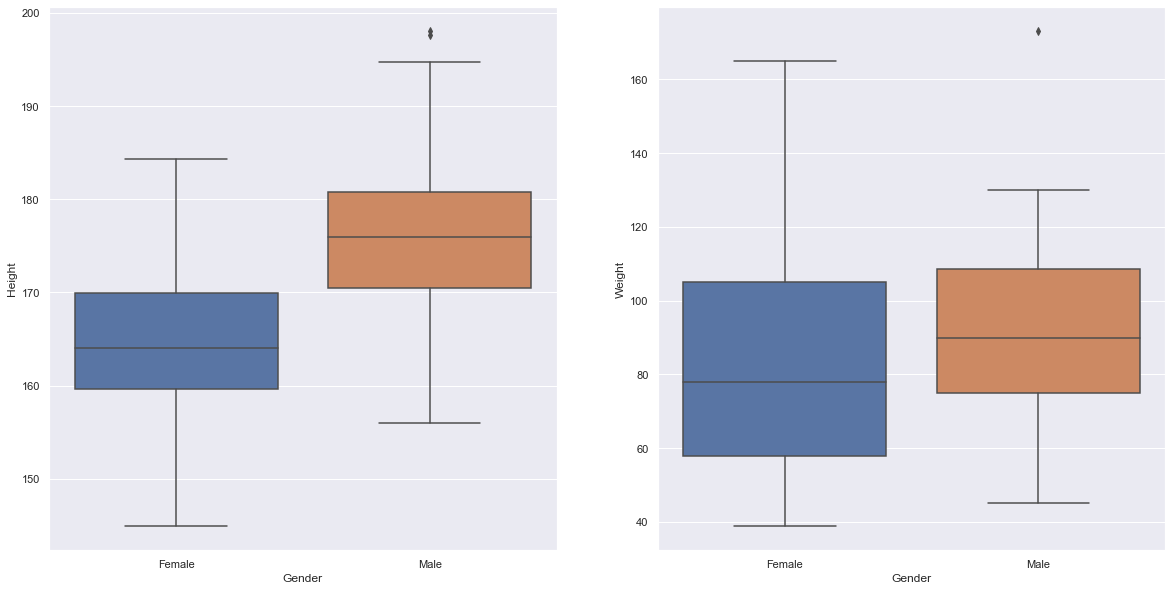

In [18]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)

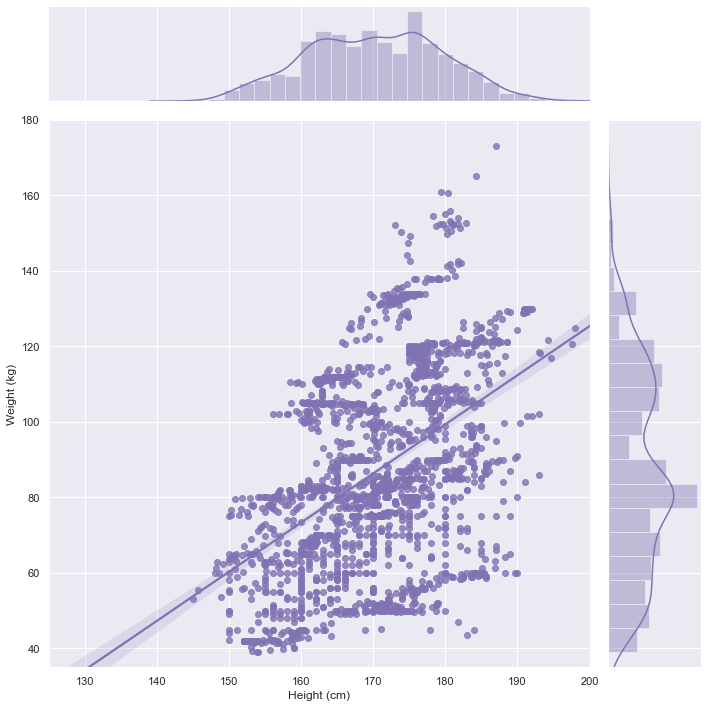

In [760]:
sns.set()
g = sns.jointplot("Height", "Weight", data=df,
                  kind="reg", truncate=False,
                  xlim=(125, 200), ylim=(35, 180),
                  color="m", height=10)
g.set_axis_labels("Height (cm)", "Weight (kg)")

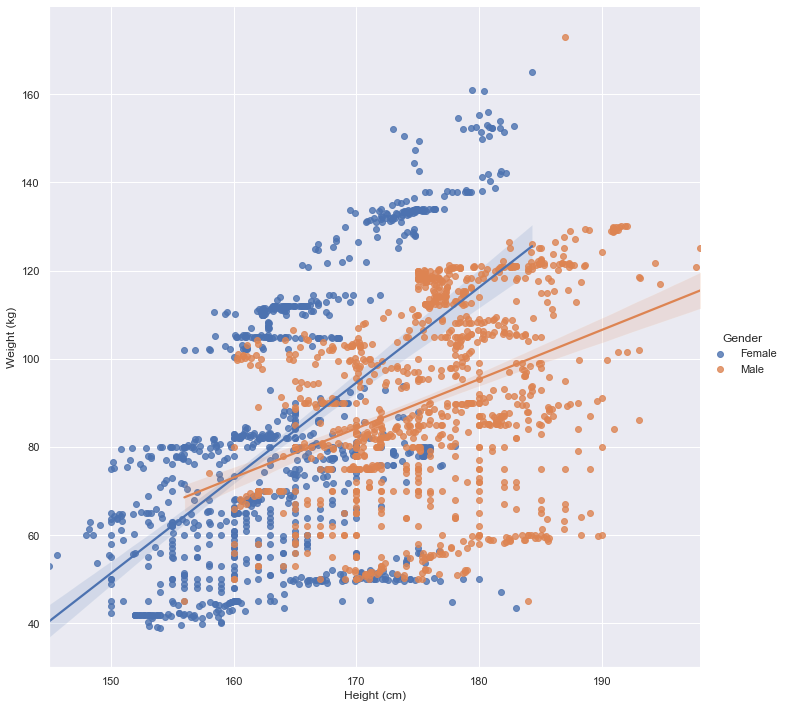

In [761]:
g = sns.lmplot(x="Height", y="Weight", hue="Gender",
               height=10, data=df)
g.set_axis_labels("Height (cm)", "Weight (kg)")

### Obesity

In [762]:
c = Counter(df['Obesity'])
print(c)

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


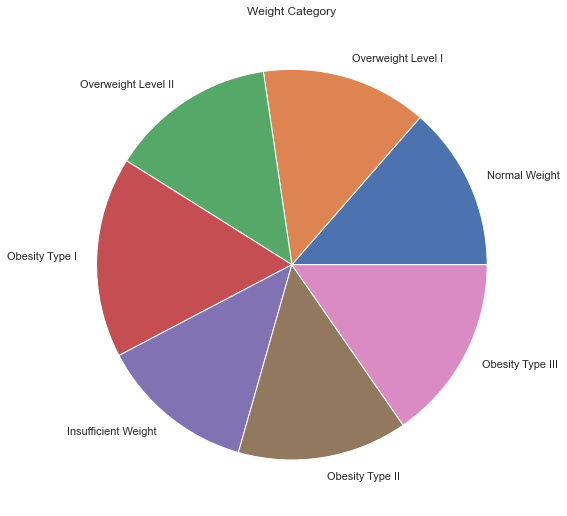

In [763]:
fig = plt.figure(figsize=(8,8))
plt.pie([float(c[v]) for v in c], labels=[str(k) for k in c], autopct=None)
plt.title('Weight Category') 
plt.tight_layout()

In [764]:
filt = df['Gender'] == 'Male'
c_m = Counter(df.loc[filt, 'Obesity'])
print(c_m)
c_f = Counter(df.loc[~filt, 'Obesity'])
print(c_f)

Counter({'Obesity Type II': 295, 'Obesity Type I': 195, 'Overweight Level II': 187, 'Normal Weight': 146, 'Overweight Level I': 145, 'Insufficient Weight': 99, 'Obesity Type III': 1})
Counter({'Obesity Type III': 323, 'Insufficient Weight': 173, 'Obesity Type I': 156, 'Overweight Level I': 145, 'Normal Weight': 141, 'Overweight Level II': 103, 'Obesity Type II': 2})


A bigger proportion of female with a higher BMI is reflected by the large slice of Obesity Type III in the pie chart below, while Obesity Type II is the most prevalent type of obesity in make. Interestingly, there is also a higher proportion of Insufficient Weight in female compared to male, this could be explained by a heavier societal pressure on women to go on diets.

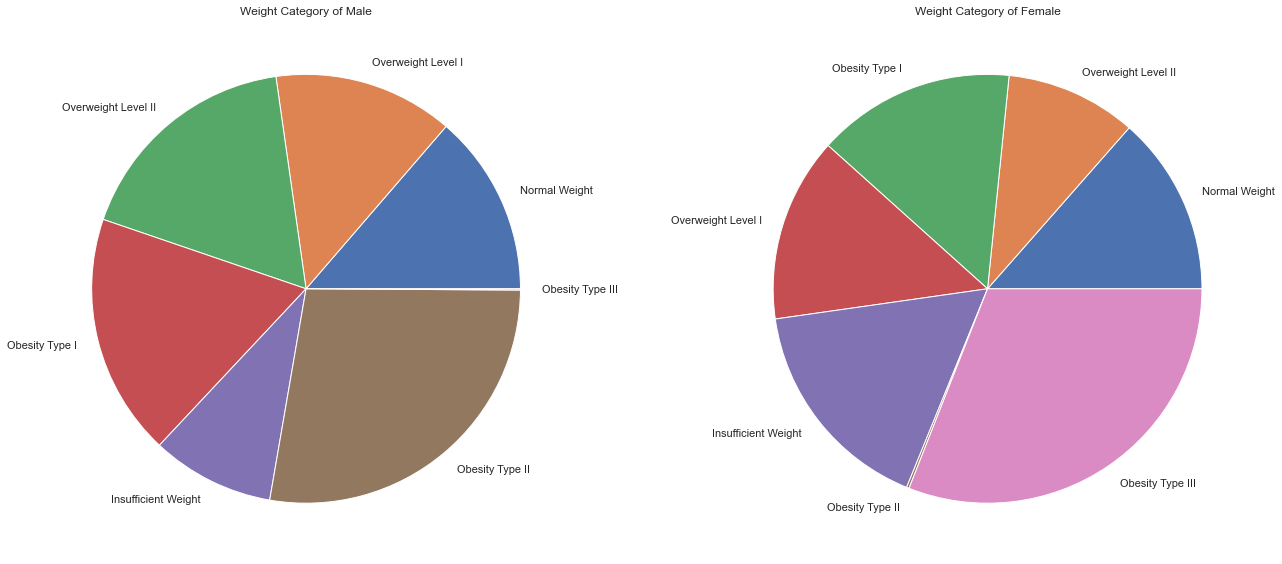

In [765]:
fig = plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.pie([float(c_m[v]) for v in c_m], labels=[str(k) for k in c_m], autopct=None)
plt.title('Weight Category of Male') 
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(c_f[v]) for v in c_f], labels=[str(k) for k in c_f], autopct=None)
plt.title('Weight Category of Female') 
plt.tight_layout()

### Eating and Exercise Habits

Family History with Overweight ['yes', 'no'] [1726, 385]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables ['Sometimes', 'Always', 'Never'] [1013, 996, 102]
Number of main meals ['3', '1', '2', '3+'] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1765, 242, 53, 51]
Smoke ['no', 'yes'] [2067, 44]
Consumption of water daily ['Between 1 and 2 L', 'More than 2 L', 'Less than a liter'] [1110, 516, 485]
Calories consumption monitoring ['no', 'yes'] [2015, 96]
Physical activity frequency ['1 or 2 days', 'I do not have', '2 or 4 days', '4 or 5 days'] [776, 720, 496, 119]
Time using technology devices ['0–2 hours', '3–5 hours', 'More than 5 hours'] [952, 915, 244]
Consumption of alcohol ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'] [1580, 457, 56, 11, 7]


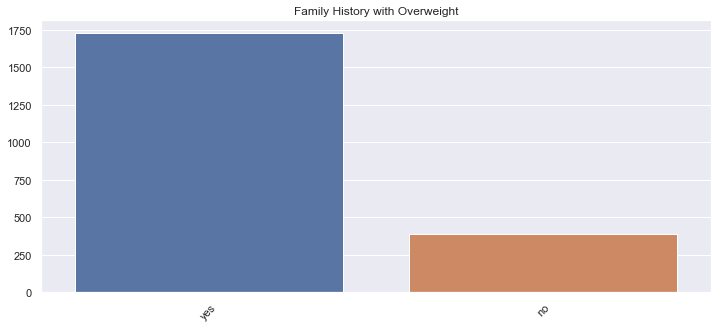

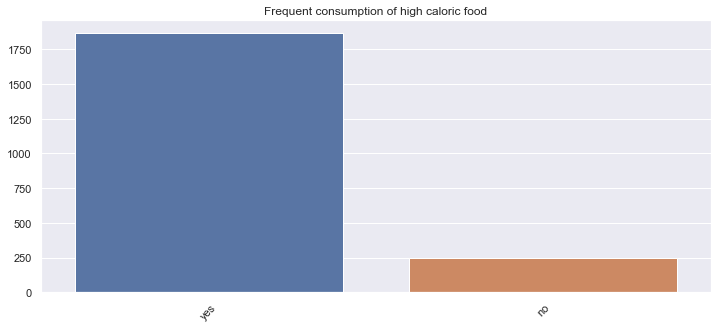

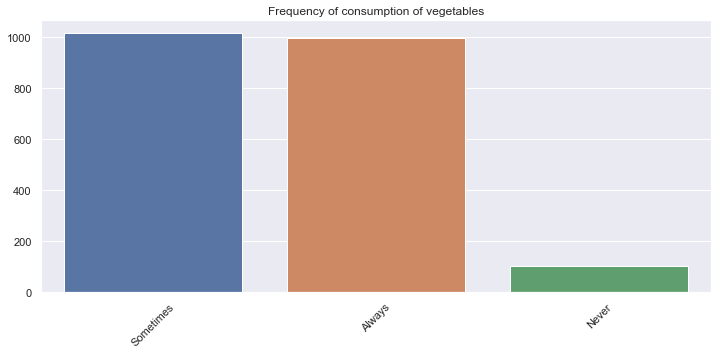

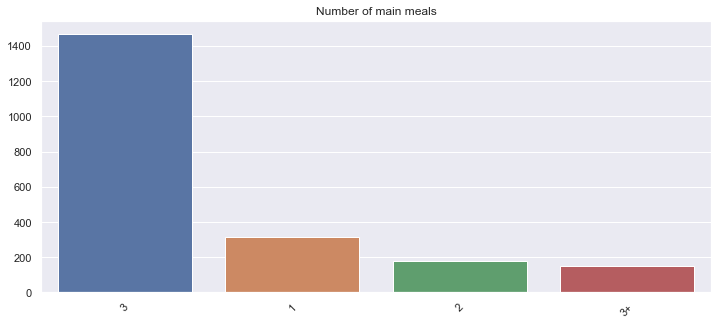

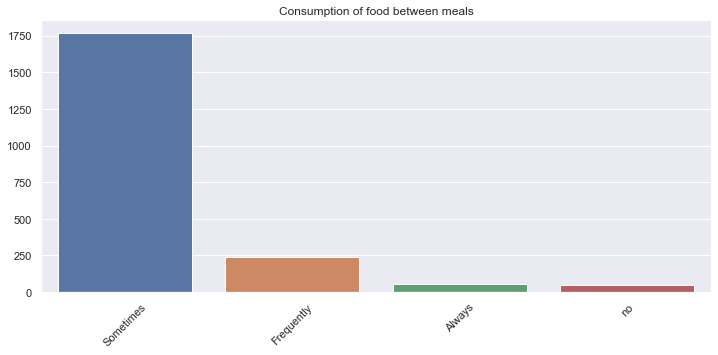

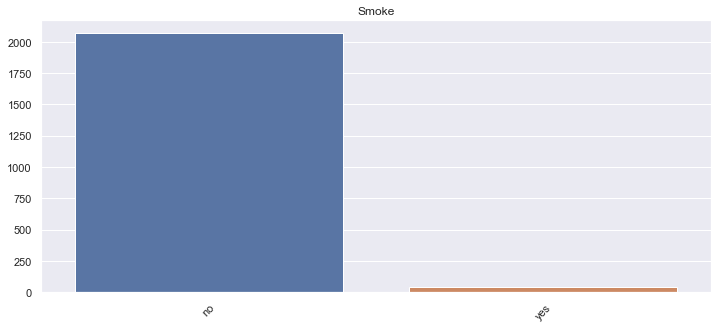

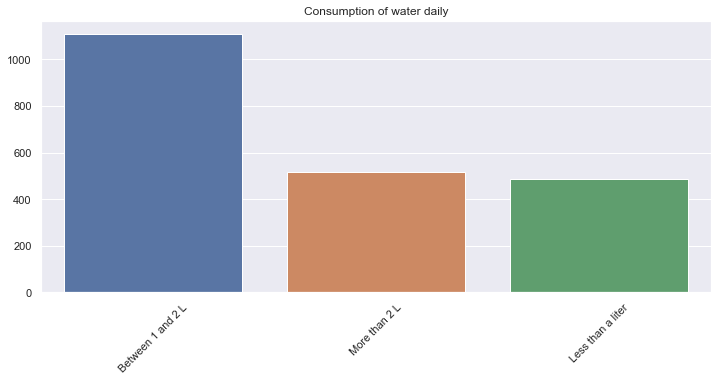

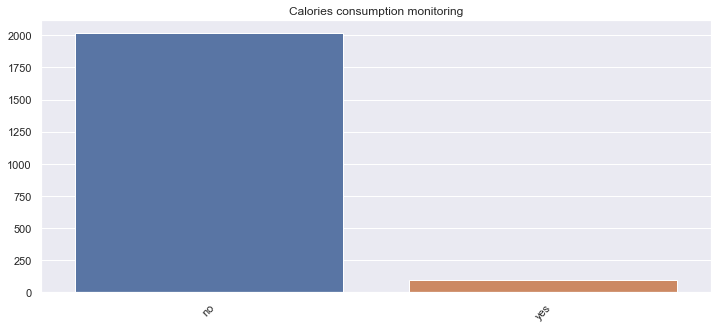

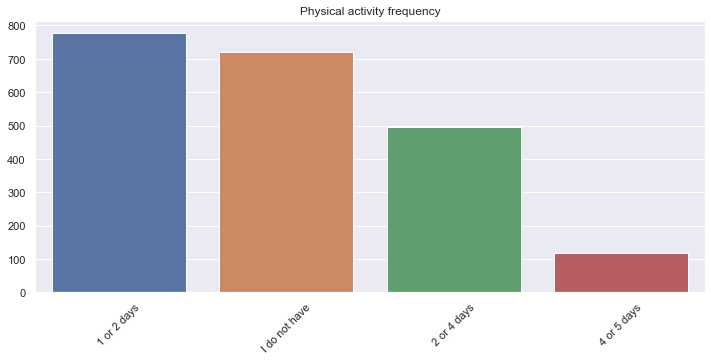

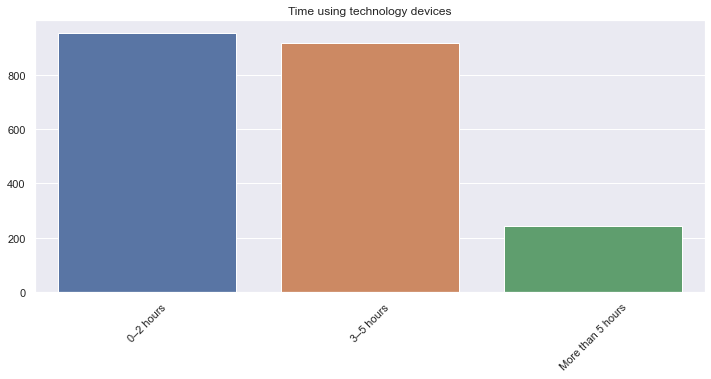

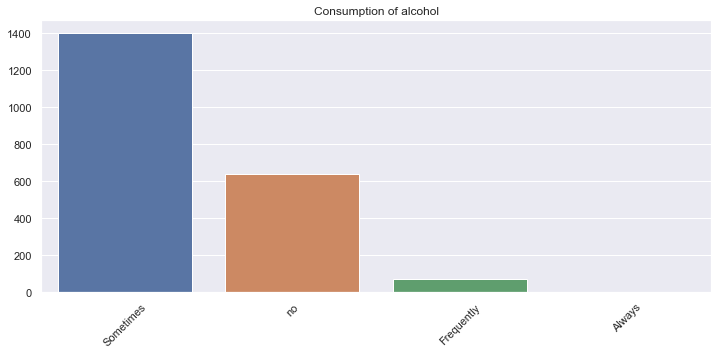

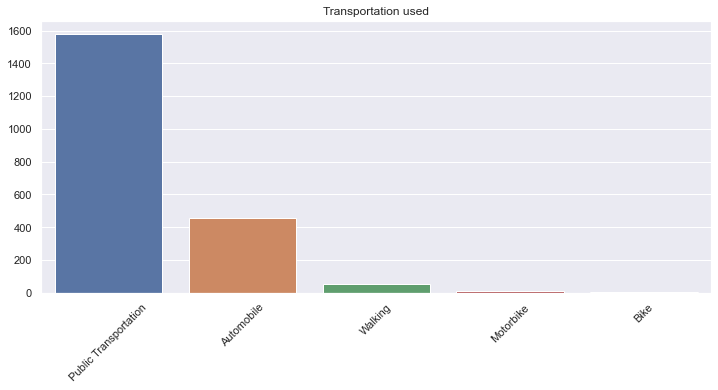

In [766]:
for a in df.columns[4:-1]:
    data = df[a].value_counts()
    values = df[a].value_counts().index.to_list()
    counts = df[a].value_counts().to_list()
    
    plt.figure(figsize=(12,5))
    ax = sns.barplot(x = values, y = counts)
    
    plt.title(a)
    plt.xticks(rotation=45)
    print(a, values, counts)

## Data Preprocessing

In [767]:
df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


#### Since classifier cannot operate with label data directly, One Hot Encoder and Label Encoding will be used to assign numeric values to each category

In [768]:
# identity categorical variables (data type would be 'object')
cat = df1.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                        True
Age                                          False
Height                                       False
Weight                                       False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Consumption of water daily                   False
Calories consumption monitoring               True
Physical activity frequency                  False
Time using technology devices                False
Consumption of alcohol                        True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

In [769]:
# identify categorical variables with more than 2 values/answers
col = [x for x in labels]
multiple = [df1[x].unique() for x in labels]

multi_col = {col: values for col, values in zip(col, multiple) if len(values)>2}
print(multi_col)
print('\n')
print('Categorical variables with more than 2 values/answers:', multi_col.keys())

{'Consumption of food between meals': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object), 'Consumption of alcohol': array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object), 'Transportation used': array(['Public Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object), 'Obesity': array(['Normal Weight', 'Overweight Level I', 'Overweight Level II',
       'Obesity Type I', 'Insufficient Weight', 'Obesity Type II',
       'Obesity Type III'], dtype=object)}


Categorical variables with more than 2 values/answers: dict_keys(['Consumption of food between meals', 'Consumption of alcohol', 'Transportation used', 'Obesity'])


In [770]:
df1.head(3)

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight


In [771]:
df1.columns

def col_no(x):
    d = {}
    d[df1.columns[x]] = x
    return(d)

print([col_no(x) for x in range(0, len(df1.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


In [772]:
x = df1[df1.columns[:-1]]
y = df['Obesity']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [773]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([2, 3, 5, ..., 2, 2, 1])

In [774]:
Scale_features = ['Age', 'Height', 'Weight']
Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])

Ordi_features = ['Consumption of food between meals', 'Consumption of alcohol']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food', 'Smoke', 'Calories consumption monitoring', 'Transportation used']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder())
])

Preprocessor = ColumnTransformer(transformers=[
    ('Scale', Scale_transformer, Scale_features),
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder = 'passthrough')
    
clf = Pipeline(steps=[('preprocessor', Preprocessor)])

In [775]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
 

In [776]:
trans_df = clf.fit_transform(x_train)
print(trans_df.shape)

(1899, 25)


In [777]:
# Column name of first two steps in pipeline

cols = [y for x in [Scale_features, Ordi_features] for y in x]
cols

['Age',
 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol']

In [778]:
# Column names of OneHotEncoder step in pipeline

ohe_cols = clf.named_steps['preprocessor'].transformers_[2][1]\
    .named_steps['Non-O'].get_feature_names(NonO_features)
ohe_cols = [x for x in ohe_cols]
ohe_cols

['Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking']

In [779]:
# Column names of remainder='Passthrough' - remaining columns that didn't get processed
non_cat

Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')

In [780]:
transformed_x_train = pd.DataFrame(trans_df, columns= ['Age', 'Height',
 'Weight',
 'Consumption of food between meals',
 'Consumption of alcohol','Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking', 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices'])

In [781]:
# transformed/processed features

transformed_x_train

,Age,Height,Weight,Consumption of food between meals,Consumption of alcohol,Gender_Female,Gender_Male,Family History with Overweight_no,Family History with Overweight_yes,Frequent consumption of high caloric food_no,...,Transportation used_Automobile,Transportation used_Bike,Transportation used_Motorbike,Transportation used_Public Transportation,Transportation used_Walking,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,-0.398094,0.226373,0.284572,2.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,3.0,2.0,0.0,1.0
1,0.951703,0.607898,0.950401,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,0.0,0.0
2,-0.680610,1.370948,0.117163,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,3.0,2.0,0.0
3,-0.303922,-0.017379,-1.385708,1.0,3.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,2.0,1.0,2.0
4,1.108656,1.773668,1.555354,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,0.983094,0.830454,0.067702,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0
1895,2.254414,0.724475,1.167271,2.0,2.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0
1896,2.395672,0.883444,0.524270,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,3.0,1.0
1897,-0.523656,0.088601,0.509051,2.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,2.0


In [782]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

{0: 'Insufficient Weight', 1: 'Normal Weight', 2: 'Obesity Type I', 3: 'Obesity Type II', 4: 'Obesity Type III', 5: 'Overweight Level I', 6: 'Overweight Level II'}


## Model Selection

Classifiers are selected and stored in a list, each classifier will be looped through and the preprocessor will be applied each time. The accuracy score of every classifier will be printed out.

In [783]:
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]

top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', Preprocessor),
                      ('classifier', classifier)])
    
    # training model
    pipe.fit(x_train, y_train)   
    print(classifier)
    
    acc_score = pipe.score(x_test, y_test)
    print("model score: %.3f" % acc_score)
    
    # using the model to predict
    y_pred = pipe.predict(x_test)
    
    target_names = [le_name_mapping[x] for x in le_name_mapping]
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    if acc_score > 0.8:
        top_class.append(classifier)

KNeighborsClassifier()
model score: 0.830
                     precision    recall  f1-score   support

Insufficient Weight       0.71      0.92      0.80        26
      Normal Weight       0.76      0.55      0.64        29
     Obesity Type I       0.86      0.91      0.89        34
    Obesity Type II       0.96      0.92      0.94        25
   Obesity Type III       1.00      1.00      1.00        35
 Overweight Level I       0.71      0.74      0.73        27
Overweight Level II       0.79      0.75      0.77        36

           accuracy                           0.83       212
          macro avg       0.83      0.83      0.82       212
       weighted avg       0.83      0.83      0.83       212

SVC(C=0.025, probability=True)
model score: 0.500
                     precision    recall  f1-score   support

Insufficient Weight       1.00      0.23      0.38        26
      Normal Weight       0.72      0.45      0.55        29
     Obesity Type I       0.25      0.97      0.40

/Users/melaniecheung/Desktop/Python_Projects/Classification/obesity/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier()
model score: 0.943
                     precision    recall  f1-score   support

Insufficient Weight       0.89      0.96      0.93        26
      Normal Weight       0.86      0.83      0.84        29
     Obesity Type I       1.00      0.94      0.97        34
    Obesity Type II       1.00      0.96      0.98        25
   Obesity Type III       1.00      1.00      1.00        35
 Overweight Level I       0.96      0.93      0.94        27
Overweight Level II       0.90      0.97      0.93        36

           accuracy                           0.94       212
          macro avg       0.94      0.94      0.94       212
       weighted avg       0.95      0.94      0.94       212

AdaBoostClassifier()
model score: 0.307
                     precision    recall  f1-score   support

Insufficient Weight       1.00      0.04      0.07        26
      Normal Weight       0.43      0.76      0.55        29
     Obesity Type I       0.13      0.26      0.17        

/Users/melaniecheung/Desktop/Python_Projects/Classification/obesity/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GradientBoostingClassifier()
model score: 0.962
                     precision    recall  f1-score   support

Insufficient Weight       0.96      1.00      0.98        26
      Normal Weight       1.00      0.90      0.95        29
     Obesity Type I       0.94      1.00      0.97        34
    Obesity Type II       1.00      0.92      0.96        25
   Obesity Type III       1.00      1.00      1.00        35
 Overweight Level I       0.89      0.93      0.91        27
Overweight Level II       0.95      0.97      0.96        36

           accuracy                           0.96       212
          macro avg       0.96      0.96      0.96       212
       weighted avg       0.96      0.96      0.96       212

SGDClassifier()
model score: 0.726
                     precision    recall  f1-score   support

Insufficient Weight       1.00      1.00      1.00        26
      Normal Weight       0.50      0.90      0.64        29
     Obesity Type I       0.71      0.44      0.55        3

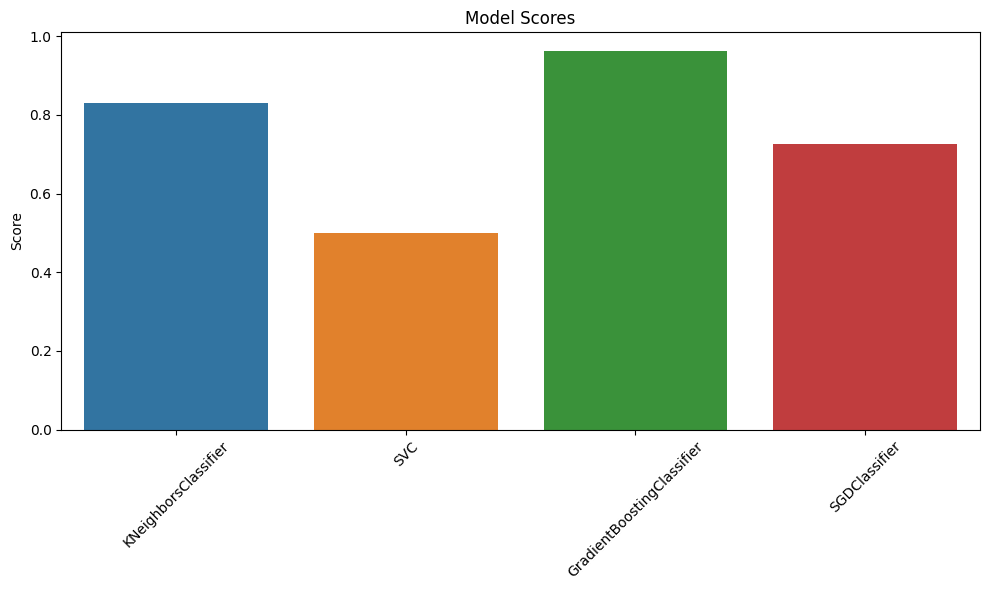

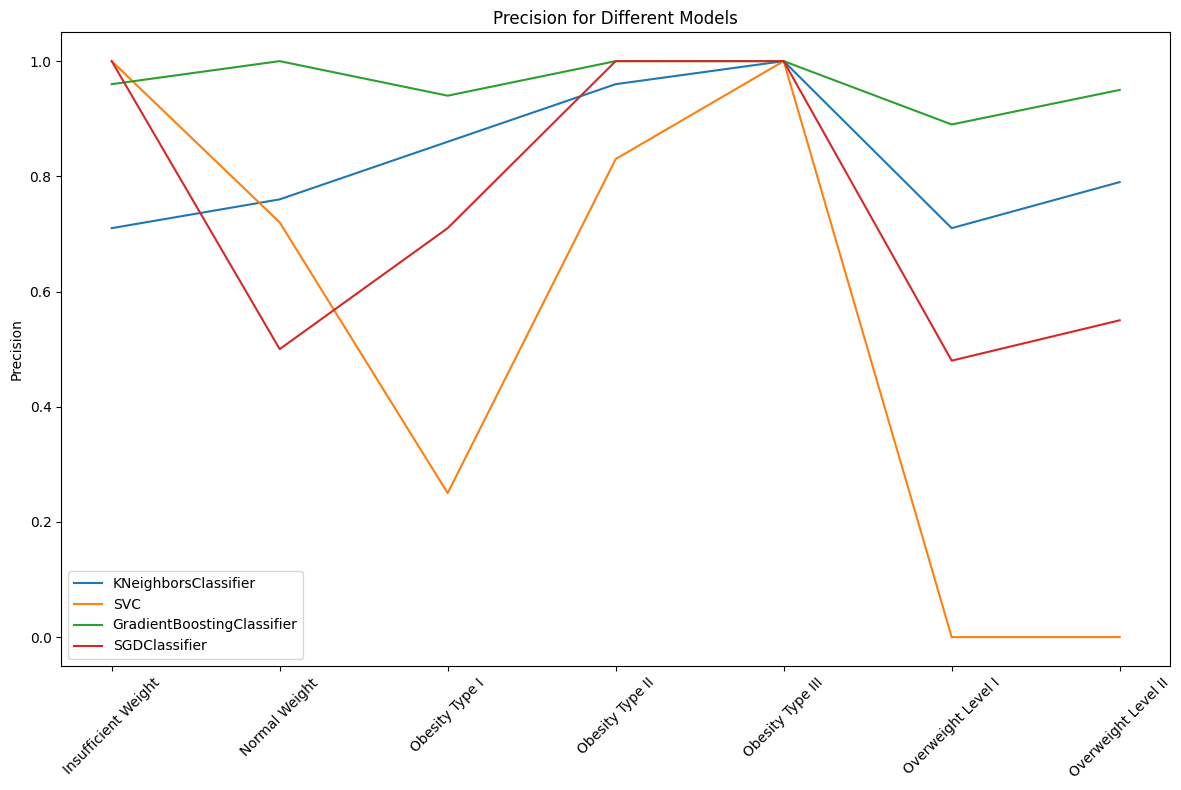

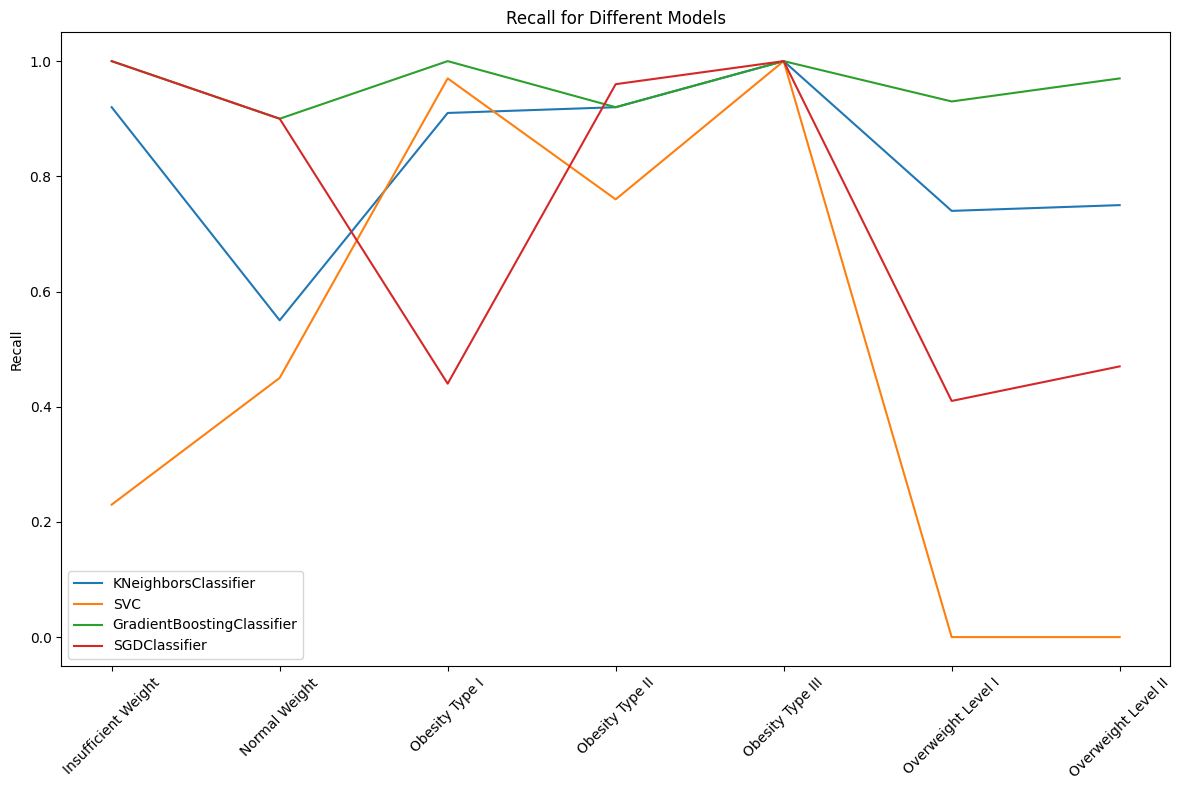

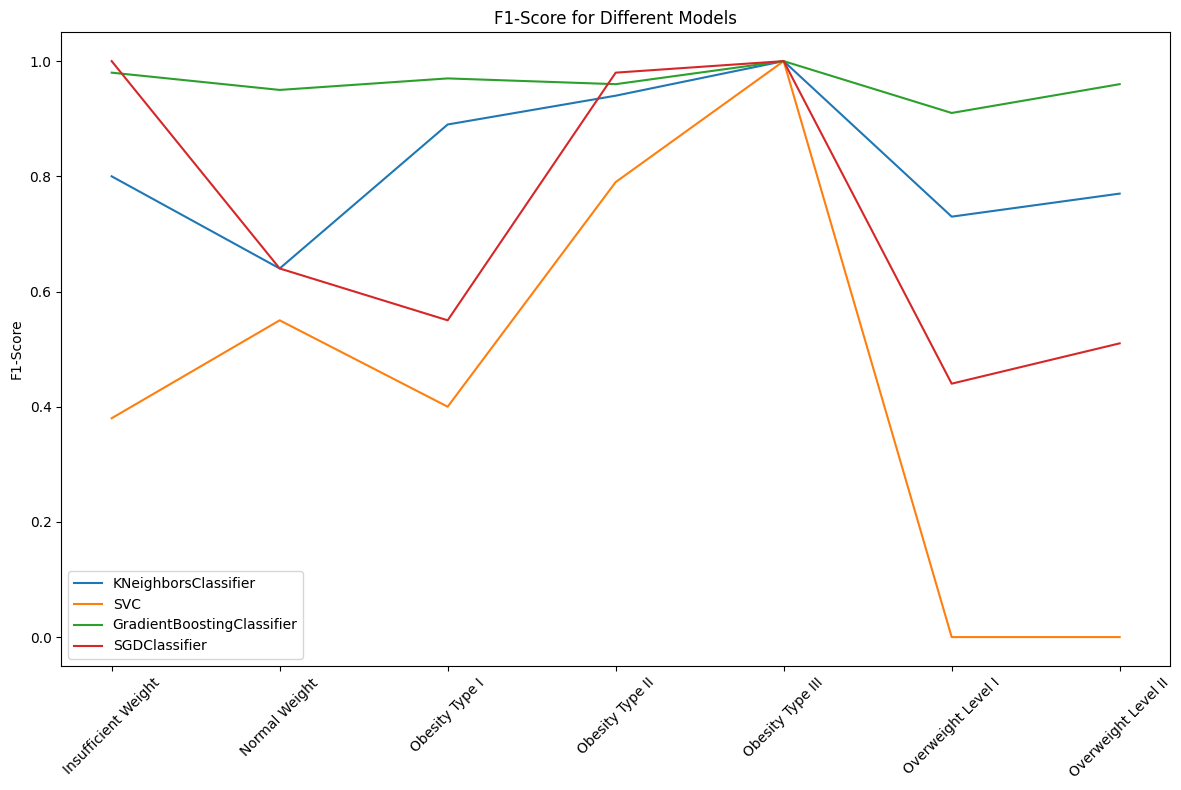

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# 数据
models = ['KNeighborsClassifier', 'SVC', 'GradientBoostingClassifier', 'SGDClassifier']
scores = [0.830, 0.500, 0.962, 0.726]
categories = ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II']

# 模型得分条形图
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=scores)
plt.title('Model Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 每个模型的精确度、召回率和F1分数条形图
precision_data = {
    'KNeighborsClassifier': [0.71, 0.76, 0.86, 0.96, 1.00, 0.71, 0.79],
    'SVC': [1.00, 0.72, 0.25, 0.83, 1.00, 0.00, 0.00],
    'GradientBoostingClassifier': [0.96, 1.00, 0.94, 1.00, 1.00, 0.89, 0.95],
    'SGDClassifier': [1.00, 0.50, 0.71, 1.00, 1.00, 0.48, 0.55]
}

# 模型的召回率数据
recall_data = {
    'KNeighborsClassifier': [0.92, 0.55, 0.91, 0.92, 1.00, 0.74, 0.75],
    'SVC': [0.23, 0.45, 0.97, 0.76, 1.00, 0.00, 0.00],
    'GradientBoostingClassifier': [1.00, 0.90, 1.00, 0.92, 1.00, 0.93, 0.97],
    'SGDClassifier': [1.00, 0.90, 0.44, 0.96, 1.00, 0.41, 0.47]
}

# 模型的F1分数数据
f1_data = {
    'KNeighborsClassifier': [0.80, 0.64, 0.89, 0.94, 1.00, 0.73, 0.77],
    'SVC': [0.38, 0.55, 0.40, 0.79, 1.00, 0.00, 0.00],
    'GradientBoostingClassifier': [0.98, 0.95, 0.97, 0.96, 1.00, 0.91, 0.96],
    'SGDClassifier': [1.00, 0.64, 0.55, 0.98, 1.00, 0.44, 0.51]
}
for metric, data in zip(['Precision', 'Recall', 'F1-Score'], [precision_data, recall_data, f1_data]):
    plt.figure(figsize=(12, 8))
    for model in models:
        sns.lineplot(x=categories, y=data[model], label=model)
    plt.title(f'{metric} for Different Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()
